In [18]:
import pandas as pd
import numpy as np
import riskfolio as rf
import yfinance as yf

In [13]:
df = pd.read_csv('meme_df.csv')
df.rename(columns={'floki': 'FLOKI'}, inplace = True)
df.set_index('timestamp', inplace = True)
df

,DOGE,SHIB,PEPE,WIF,BONK,FLOKI
timestamp,,,,,,
2023-05-23,0.073093,0.000009,0.000002,1.973846e-12,4.031684e-07,0.000031
2023-05-24,0.072956,0.000009,0.000002,1.938059e-12,4.037304e-07,0.000032
2023-05-25,0.070846,0.000009,0.000001,1.882061e-12,3.939341e-07,0.000032
2023-05-26,0.070926,0.000009,0.000001,1.860434e-12,4.025760e-07,0.000031
2023-05-27,0.071095,0.000009,0.000001,1.887505e-12,4.023630e-07,0.000031
...,...,...,...,...,...,...
2024-05-16,0.155710,0.000025,0.000011,3.166772e-12,2.486058e-05,0.000212
2024-05-17,0.149711,0.000025,0.000010,3.096412e-12,2.391884e-05,0.000207
2024-05-18,0.155671,0.000025,0.000010,3.154565e-12,2.446742e-05,0.000211


In [9]:
btc_data = yf.download('BTC-USD', start = '2023-05-23', end = '2024-05-21')
btc_data = btc_data[('Adj Close')]
btc_data

[*********************100%%**********************]  1 of 1 completed


/Users/brandonamarasingam/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
2023-05-23    27225.726562
2023-05-24    26334.818359
2023-05-25    26476.207031
2023-05-26    26719.291016
2023-05-27    26868.353516
                  ...     
2024-05-15    66267.492188
2024-05-16    65231.582031
2024-05-17    67051.875000
2024-05-18    66940.804688
2024-05-19    66278.367188
Name: Adj Close, Length: 363, dtype: float64

In [14]:
#Get returns
returns = df.pct_change().dropna() #Overall returns for each asset
returns_bench = btc_data.pct_change().dropna()

In [15]:
returns

,DOGE,SHIB,PEPE,WIF,BONK,FLOKI
timestamp,,,,,,
2023-05-24,-0.001885,0.011176,0.047943,-0.018131,0.001394,0.023921
2023-05-25,-0.028923,-0.042847,-0.100426,-0.028894,-0.024264,-0.003939
2023-05-26,0.001139,-0.000632,-0.007256,-0.011491,0.021937,-0.011877
2023-05-27,0.002377,0.007177,0.017934,0.014551,-0.000529,0.001256
2023-05-28,0.023605,0.007758,0.043367,-0.018159,0.383902,0.061016
...,...,...,...,...,...,...
2024-05-16,0.070746,0.099481,0.004378,0.021626,0.085663,0.122284
2024-05-17,-0.038525,-0.028396,-0.047617,-0.022218,-0.037881,-0.024258
2024-05-18,0.039812,0.021128,0.014717,0.018781,0.022935,0.021023


In [16]:
returns_bench

Date
2023-05-24   -0.032723
2023-05-25    0.005369
2023-05-26    0.009181
2023-05-27    0.005579
2023-05-28    0.045306
                ...   
2024-05-15    0.076596
2024-05-16   -0.015632
2024-05-17    0.027905
2024-05-18   -0.001656
2024-05-19   -0.009896
Name: Adj Close, Length: 362, dtype: float64

In [19]:
#Building portfolio object
port = rf.Portfolio(returns)

port.assets_stats(
    method_mu = 'hist', #Selected method to estimate expected returns based on historical data
    method_cov = 'hist', #Selected method to estimate covariance matrix based on historical data
    d = 0.94)

port.benchindex = returns_bench

In [20]:
#Estimate optimal portfolio for mean/cvar ratio
w = port.optimization(
    model = 'Classic', #Either classic, BL(Black Litterman), FM(Factor model), BLFM(Black Litterman w/Factor models)
    rm = 'CVaR', #Risk measure
    obj = 'Sharpe', #Objective function, could be MinRisk, MaxRet, Utility or Sharpe
    hist = True, #Use historical scenarios for risk measures
    rf = 0, #Risk free rate
    l = 0) #Risk aversion factor, only useful when obj is 'utility'
w #Optimal weights for our portfolio

,weights
DOGE,5.894067e-12
SHIB,9.349273e-11
PEPE,4.342911e-11
WIF,1.227284e-01
BONK,8.772716e-01
FLOKI,1.448731e-10


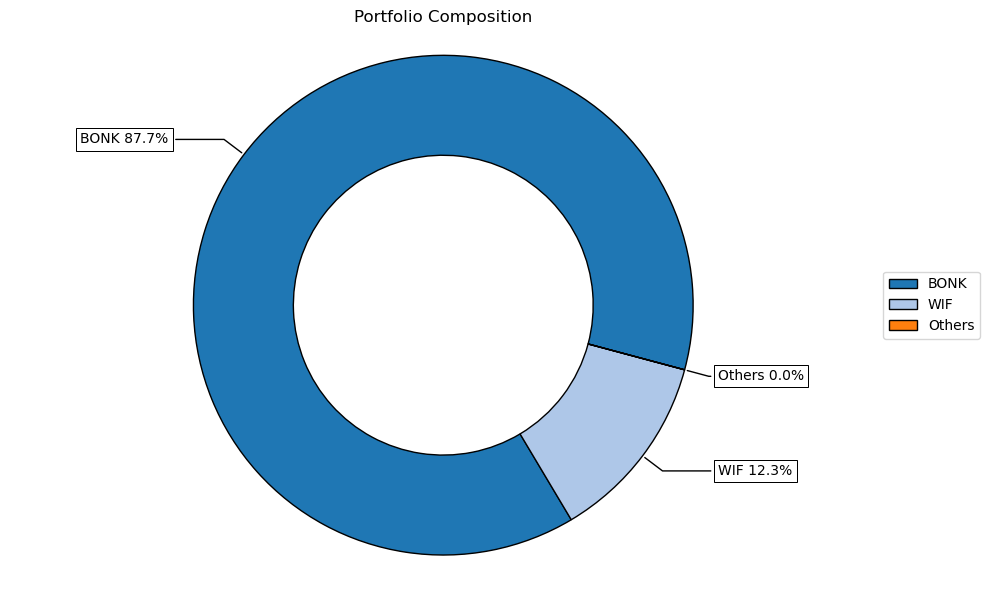

In [21]:
#Plotting optimal portfolio composition
ax = rf.plot_pie(
    w = w,
    others = 0.05,
    nrow = 25,
    cmap = 'tab20',
    height = 6,
    width = 10,
    ax = None)

In [22]:
#Calculate efficient frontier
points = 50

frontier = port.efficient_frontier(model = 'Classic',
                                   rm = 'CVaR',
                                   rf = 0,
                                   hist = True)

display(frontier.T.head())

,DOGE,SHIB,PEPE,WIF,BONK,FLOKI
0,0.384004,0.417602,1.837193e-10,0.198394,2.932626e-10,7.339909e-11
1,0.153048,0.530758,2.289630e-11,0.149511,1.666831e-01,9.707748e-11
2,0.169707,0.478103,5.608362e-11,0.054696,2.412492e-01,5.624414e-02
3,0.152170,0.410247,1.014538e-11,0.073821,3.092625e-01,5.449923e-02
4,0.024884,0.463323,1.854438e-10,0.074250,3.529519e-01,8.459123e-02


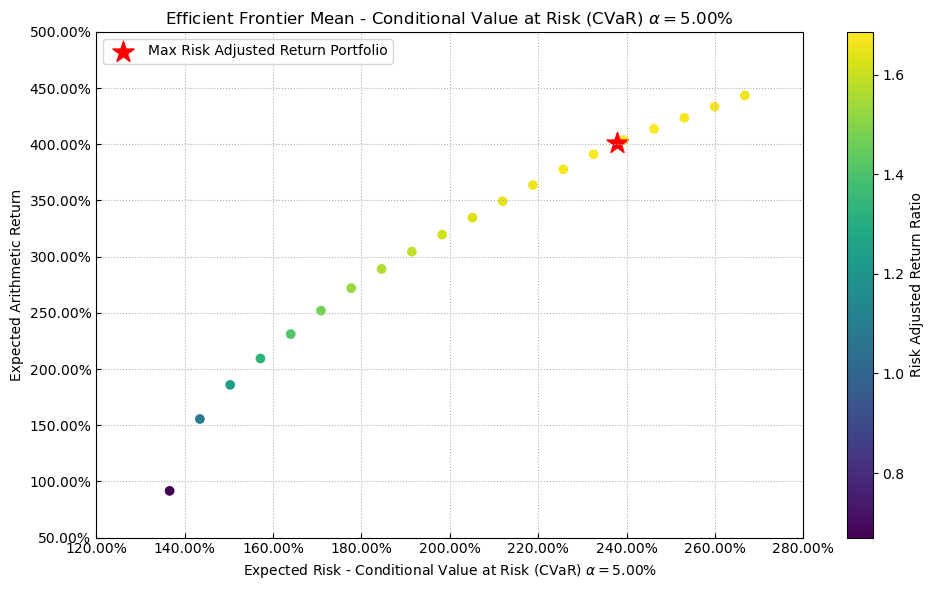

In [23]:
#Plot efficient frontier

ax = rf.plot_frontier(w_frontier = frontier,
                      mu = port.mu,
                      cov = port.cov,
                      returns = port.returns,
                      rm = 'CVaR',
                      rf = 0,
                      alpha = 0.05,
                      cmap = 'viridis',
                      w = w,
                      label = 'Max Risk Adjusted Return Portfolio',
                      marker = '*',
                      s = 16,
                      c = 'r',
                      height = 6,
                      width = 10,
                      ax = None
                      )

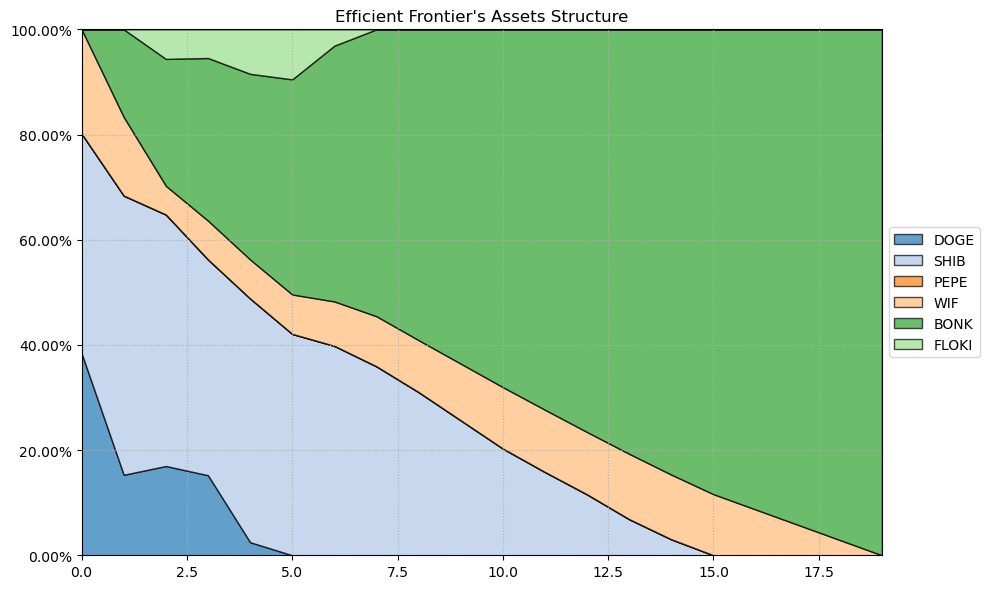

In [24]:
#Plot efficient frontier composition

ax = rf.plot_frontier_area(w_frontier = frontier,
                           cmap = 'tab20',
                           n_colors = 20,
                           height = 6,
                           width = 10,
                           ax = None)

<Axes: title={'center': 'Historical Compounded Cumulative Returns'}>

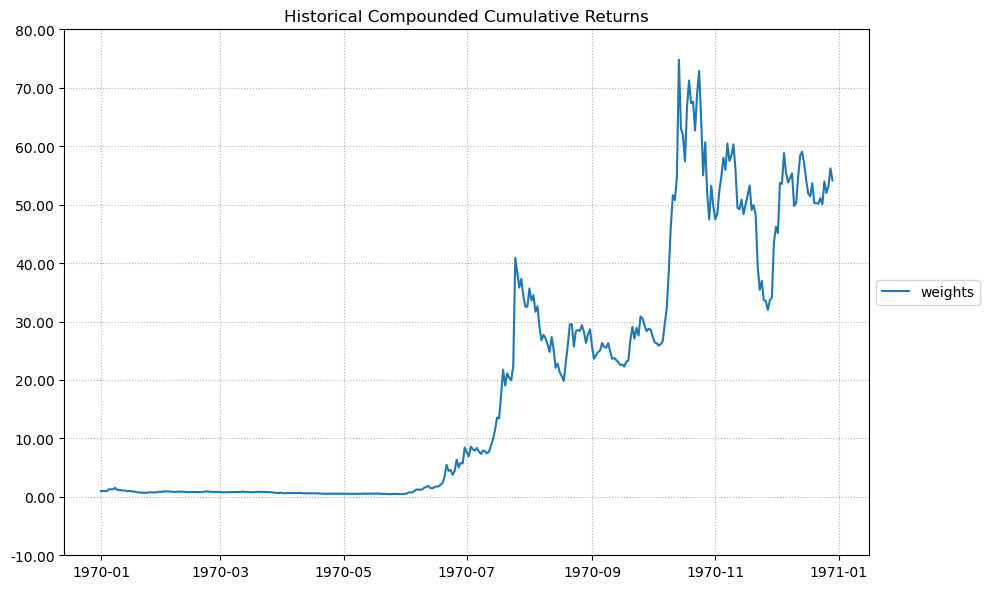

In [25]:
#Compounded returns
rf.plot_series(returns = returns, w = w)

array([<Axes: title={'center': 'Historical Compounded Cumulative Returns'}>,
       <Axes: title={'center': 'Historical Uncompounded Drawdown'}>],
      dtype=object)

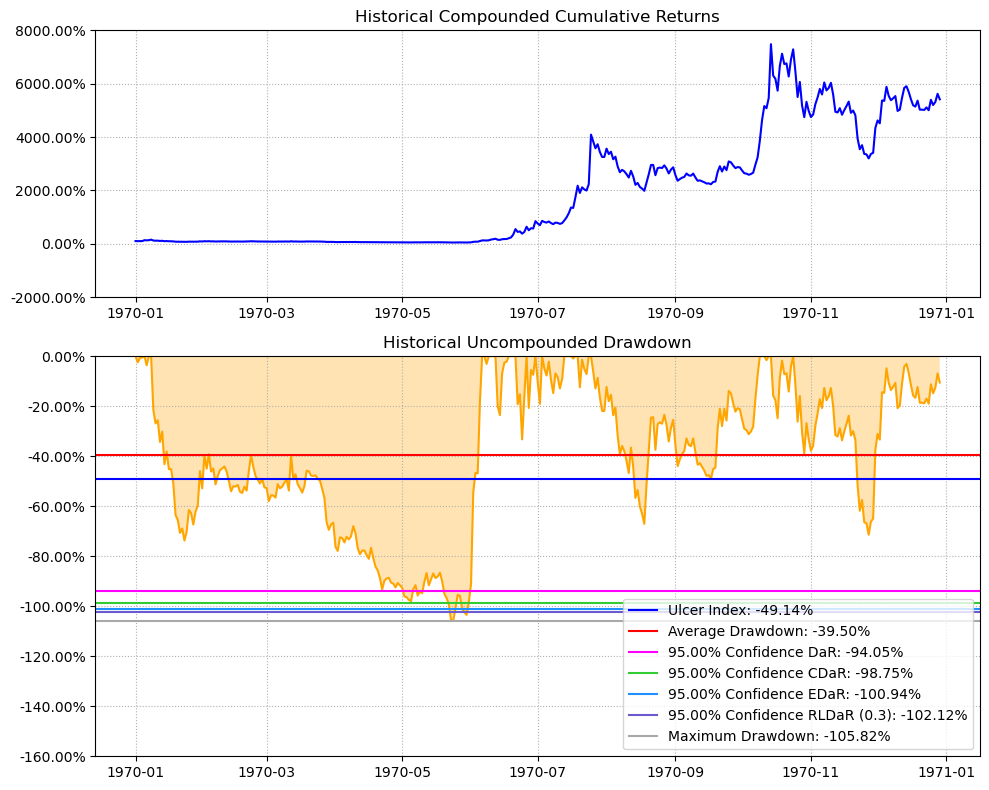

In [26]:
#Compounded returns + max drawdown
rf.plot_drawdown(returns, w = w)